In [52]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
%matplotlib inline
DATA_DIR = path.join('..', 'data')

In [53]:
results = pd.read_csv(path.join(DATA_DIR, 'results.csv'),
                      names=['Init_station','Init_time','Init_count','Count_type']+list(range(7000)))
results.set_index(list(results.columns[:4]), inplace=True)
results.head()

0             1     \
Init_station Init_time Init_count Count_type                            
0            3         1          S           7947054.0  7.947054e+06   
                                  I                 1.0  1.006943e+00   
                                  R                 0.0  1.388889e-02   
             60        1          S           7947054.0  7.947054e+06   
                                  I                 1.0  1.006943e+00   

                                                      2             3     \
Init_station Init_time Init_count Count_type                               
0            3         1          S           7.947054e+06  7.947054e+06   
                                  I           1.013934e+00  1.020973e+00   
                                  R           2.787421e-02  4.195662e-02   
             60        1          S           7.947054e+06  7.947054e+06   
                                  I           1.013934e+00  1.020973e+00   

                                                      4             5     \
Init_station Init_time Init_count Count_type                               
0            3         1          S           7.947054e+06  7.947054e+06   
                                  I           1.028095e+00  1.035017e+00   
                                  R           5.613680e-02  7.041590e-02   
             60        1          S           7.947054e+06  7.947054e+06   
                                  I           1.028062e+00  1.035199e+00   

                                                      6             7     \
Init_station Init_time Init_count Count_type                               
0            3         1          S           7.947054e+06  7.947054e+06   
                                  I           1.041915e+00  1.048874e+00   
                                  R           8.479113e-02  9.926218e-02   
             60        1          S           7.947054e+06  7.947054e+06   
                                  I           1.042386e+00  1.049623e+00   

                                                      8             9     \
Init_station Init_time Init_count Count_type                               
0            3         1          S           7.947054e+06  7.947054e+06   
                                  I           1.056188e+00  1.063393e+00   
                                  R           1.138299e-01  1.284991e-01   
             60        1          S           7.947054e+06  7.947054e+06   
                                  I           1.056910e+00  1.064248e+00   

                                              ...   6990  6991  6992  6993  \
Init_station Init_time Init_count Count_type  ...                            
0            3         1          S           ...    NaN   NaN   NaN   NaN   
                                  I           ...    NaN   NaN   NaN   NaN   
                                  R           ...    NaN   NaN   NaN   NaN   
             60        1          S           ...    NaN   NaN   NaN   NaN   
                                  I           ...    NaN   NaN   NaN   NaN   

                                              6994  6995  6996  6997  6998  \
Init_station Init_time Init_count Count_type                                 
0            3         1          S            NaN   NaN   NaN   NaN   NaN   
                                  I            NaN   NaN   NaN   NaN   NaN   
                                  R            NaN   NaN   NaN   NaN   NaN   
             60        1          S            NaN   NaN   NaN   NaN   NaN   
                                  I            NaN   NaN   NaN   NaN   NaN   

                                              6999  
Init_station Init_time Init_count Count_type        
0            3         1          S            NaN  
                                  I            NaN  
                                  R            NaN  
             60        1          S            N

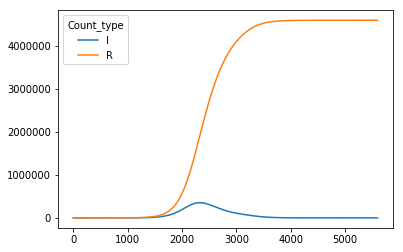

In [54]:
results.xs((0,3,1), level=('Init_station','Init_time','Init_count')).T.drop(columns='S').plot()

In [55]:
filtered=results.xs((1, 'I'), level=('Init_count', 'Count_type')).fillna(0)
filtered_R=results.xs((1, 'R'), level=('Init_count', 'Count_type')).fillna(0)

In [56]:
filtered_R.T.max().head()

Init_station  Init_time
0             3            4.599169e+06
              60           7.401659e+03
              99           7.401659e+03
              108          7.401659e+03
              123          7.401659e+03
dtype: float64

In [57]:
filtered.T.max().head()

Init_station  Init_time
0             3            354889.284154
              60              802.024580
              99              802.024580
              108             802.024580
              123             802.024580
dtype: float64

In [58]:
peaks = pd.concat([filtered.T.idxmax(), filtered.T.max(), filtered_R.T.max()], axis=1)
peaks.columns = ['Time', 'Value', 'Total']
peaks['Time'] = peaks['Time'] / 24

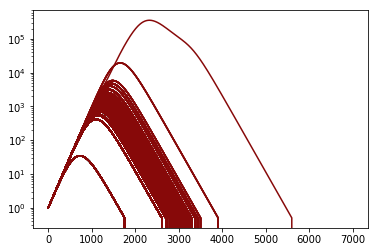

In [36]:
filtered.T.plot(legend=None, color='#870909', logy=True)

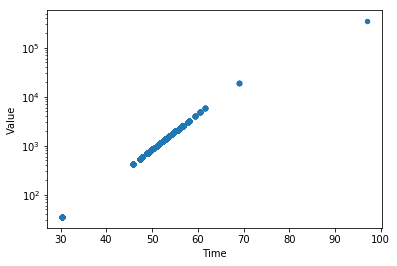

In [38]:
peaks.plot.scatter('Time', 'Value', logy=True)

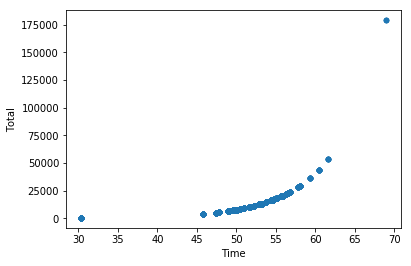

In [62]:
peaks[peaks['Total'] < 3e6].plot.scatter('Time', 'Total')

In [63]:
peaks[peaks['Time'] < 40].describe()

,Time,Value,Total
count,70.000,70.000000,7.000000e+01
mean,30.375,34.369857,3.110655e+02
std,0.000,0.000000,5.725385e-14
min,30.375,34.369857,3.110655e+02
25%,30.375,34.369857,3.110655e+02
50%,30.375,34.369857,3.110655e+02
75%,30.375,34.369857,3.110655e+02
max,30.375,34.369857,3.110655e+02


In [79]:
group_1 = peaks[peaks['Time'] < 40]
set(group_1.index.get_level_values('Init_station'))

{3, 14, 15, 29, 55, 63, 69, 119, 210, 217, 222, 224, 312, 338}

In [64]:
peaks[(peaks['Time'] > 40) & (peaks['Time'] < 68)].describe()

,Time,Value,Total
count,1899.000000,1899.000000,1899.000000
mean,51.341430,1269.215822,11716.941075
std,3.622325,882.699332,8153.210189
min,45.750000,415.848423,3834.661621
25%,49.000000,711.493699,6565.437315
50%,50.458333,905.035684,8353.119484
75%,54.458333,1753.293305,16188.202750
max,61.666667,5822.323850,53772.587264


In [60]:
peaks[(peaks['Time'] > 40) & (peaks['Time'] < 68)].sample(1)

,,Time,Value,Total
Init_station,Init_time,,,
355,108,53.208333,1423.690597,13143.781582


In [64]:
g2_counts=peaks[(peaks['Time'] > 40) & (peaks['Time'] < 68)].reset_index().groupby('Init_station').count()
g2_counts[g2_counts['Total'] != 5]

,Init_time,Time,Value,Total
Init_station,,,,
0,4,4,4,4


In [65]:
peaks[(peaks['Time'] > 68) & (peaks['Time'] < 90)].describe()

,Time,Value,Total
count,5.000000,5.00000,5.000000
mean,68.916667,19380.99084,179009.557332
std,0.000000,0.00000,0.000000
min,68.916667,19380.99084,179009.557332
25%,68.916667,19380.99084,179009.557332
50%,68.916667,19380.99084,179009.557332
75%,68.916667,19380.99084,179009.557332
max,68.916667,19380.99084,179009.557332


In [61]:
peaks[(peaks['Time'] > 68) & (peaks['Time'] < 90)].reset_index().groupby('Init_station').count()

,Init_time,Time,Value,Total
Init_station,,,,
82,5,5,5,5


In [66]:
peaks[peaks['Time'] > 90]

,,Time,Value,Total
Init_station,Init_time,,,
0,3,96.916667,354889.284154,4.599169e+06


In [26]:
results.xs((82,60,1), level=('Init_station','Init_time','Init_count')).drop(columns=range(5000,7000))

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Count_type,,,,,,,,,,,,,,,,,,,,,
S,7947054.0,7.947054e+06,7.947054e+06,7.947054e+06,7.947054e+06,7.947054e+06,7.947054e+06,7.947054e+06,7.947054e+06,7.947054e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,1.0,1.006944e+00,1.013937e+00,1.020978e+00,1.028068e+00,1.035207e+00,1.042396e+00,1.049635e+00,1.056924e+00,1.064264e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R,0.0,1.388889e-02,2.787423e-02,4.195669e-02,5.613694e-02,7.041566e-02,8.479354e-02,9.927127e-02,1.138495e-01,1.285290e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


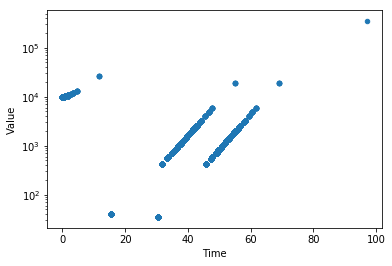

In [3]:
I_series = results.xs('I', level='Count_type').fillna(0)
all_peaks = pd.concat([I_series.T.idxmax(), I_series.T.max(), I_series.T.max()], axis=1)
all_peaks.columns = ['Time', 'Value', 'Total']
all_peaks['Time'] = all_peaks['Time'] / 24
all_peaks.plot.scatter('Time', 'Value', logy=True)

# Minor epidemic group

In [4]:
group_1 = all_peaks[all_peaks['Value'] < 100]
set(group_1.index.get_level_values('Init_station'))

{3, 14, 15, 29, 55, 63, 69, 119, 210, 217, 222, 224, 312, 338}

In [5]:
move_data = pd.read_csv(path.join(DATA_DIR, 'journey_count.csv'))
move_data.head()

,Start station,End station,Day,Entry hour,Journey count
0,Acton Central,Acton Central,Sat,18,1
1,Acton Central,Acton Central,Sun,7,1
2,Acton Central,Acton Central,Thu,13,1
3,Acton Central,Acton Central,Wed,17,1
4,Acton Central,Baker Street,Mon,7,1


In [7]:
STATION_LOOKUP = {
    i: name for i, name in enumerate(move_data['Start station'].unique())
}

In [11]:
station_names=set(STATION_LOOKUP[i] for i in group_1.index.get_level_values('Init_station'))
station_names

{'Aldgate',
 'Bank',
 'Barbican',
 'Blackfriars',
 'Cannon Street',
 'Chancery Lane',
 'City Thameslink',
 'Fenchurch St NR',
 'Liverpool Street',
 'Mansion House',
 'Monument',
 'Moorgate',
 'St Pauls',
 'Tower Gateway'}

## Hypothesis: initial pop related to peak

In [27]:
from simulate import get_pop_data
pop_data = get_pop_data()[0]
pop_data.set_index('Station', inplace=True)
pop_data.head()

,Local authority,Population,Station count,Station population
Station,,,,
Acton Central,Ealing,329966,26,12691.000000
Acton Main Line,Ealing,329966,26,12691.000000
Acton Town,Ealing,329966,26,12691.000000
Aldgate,City of London,7472,14,533.714286
Aldgate East,Tower Hamlets,240495,28,8589.107143


In [33]:
pop_data.loc['Aldgate']['Station population']

533.7142857142857

In [43]:
all_peaks['Station_name'] = [STATION_LOOKUP[s] for s in all_peaks.reset_index()['Init_station']]
all_peaks['Station_pop'] = all_peaks['Station_name'].apply(lambda s: pop_data.loc[s]['Station population'])
all_peaks.head()

Time          Value          Total  \
Init_station Init_time Init_count                                            
0            3         1           96.916667  354889.284154  354889.284154   
             60        1           49.708333     802.024580     802.024580   
             99        1           49.708333     802.024580     802.024580   
             108       1           49.708333     802.024580     802.024580   
             123       1           49.708333     802.024580     802.024580   

                                    Station_name  Station_pop  
Init_station Init_time Init_count                              
0            3         1           Acton Central      12691.0  
             60        1           Acton Central      12691.0  
             99        1           Acton Central      12691.0  
             108       1           Acton Central      12691.0  
             123       1           Acton Central      12691.0

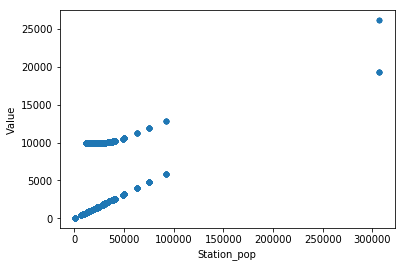

In [46]:
all_peaks[all_peaks['Value'] < 3e5].plot.scatter('Station_pop', 'Value')